In [35]:
import numpy as np
import numpy.ma as ma
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
# ADC Voltage
RAIL_VOLTAGE = 3.3
ADC_QUANTIZATION = 2 ** 12  # for 12 bit ADC

In [37]:
dat = np.genfromtxt('2016-04-26_calibration_mod.txt')

In [76]:
currents = np.array([0.1, 1.0, 2.0, 3.0])
values = np.array([])
for i in currents:
    mask=[a != i for a in dat[:,0]]
    mx = ma.masked_array(dat[:,1], mask)
    values = np.append(values, int(mx.mean()) * RAIL_VOLTAGE / ADC_QUANTIZATION)

In [40]:
slope, intercept, r_value, p_value, std_err = stats.linregress(currents, values)

In [41]:
line = currents * slope + intercept

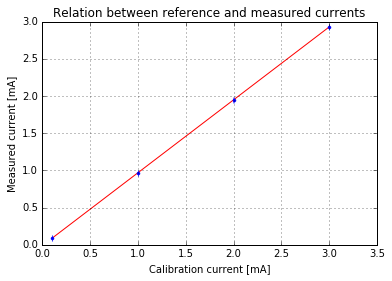

In [77]:
plt.plot(currents, line, 'r-')
plt.errorbar(currents,values,xerr=std_err, fmt='.', color='blue')
plt.xlabel('Calibration current [mA]')
plt.ylabel('Measured current [mA]')
plt.title('Relation between reference and measured currents')
plt.grid(1)

In [80]:
print('slope: {}'.format(slope))

slope: 0.9801675611142459


In [81]:
print('intercept: {}'.format(intercept))

intercept: -0.012535071714850021


In [82]:
def get_calibrated_value(adc_int_value):
    value = adc_int_value * RAIL_VOLTAGE / ADC_QUANTIZATION
    return (value - intercept) / slope

In [83]:
get_calibrated_value(3633)

2.9989898945806144